In [24]:
import nltk
import pandas as pd
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [25]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LexusYj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LexusYj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
df=pd.read_csv('Emotion_classify_Data.csv')
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [28]:
df['Emotion'].value_counts()

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64

In [29]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LexusYj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LexusYj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Define preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()

    tokens = word_tokenize(text.lower())  # Tokenization & Lowercasing
    filtered_tokens = [stemmer.stem(word) for word in tokens if word.isalnum() and word not in stop_words]

    return ' '.join(filtered_tokens)

# Ensure no NaN values before applying function
df['Comment'] = df['Comment'].fillna('')

# Apply preprocessing function
df['preprocessed_comment'] = df['Comment'].apply(preprocess_text)


OSError: No such file or directory: 'C:\\Users\\LexusYj\\AppData\\Roaming\\nltk_data\\corpora\\stopwords\\english'

In [16]:
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [37]:
encoder=LabelEncoder()
df['emotion_no']=encoder.fit_transform(df['Emotion'])

In [38]:
df.head()

,Comment,Emotion,preprocessed_comment,emotion_no
0,i seriously hate one subject to death but now ...,fear,serious hate one subject death feel reluct drop,1
1,im so full of life i feel appalled,anger,im full life feel appal,0
2,i sit here to write i start to dig out my feel...,fear,sit write start dig feel think afraid accept p...,1
3,ive been really angry with r and i feel like a...,joy,ive realli angri r feel like idiot trust first...,2
4,i feel suspicious if there is no one outside l...,fear,feel suspici one outsid like raptur happen someth,1


In [39]:
X=df['preprocessed_comment']
y=df['emotion_no']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
v=TfidfVectorizer()
X_train_cv=v.fit_transform(X_train)
X_test_cv=v.transform(X_test)

In [47]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Assuming you've already defined and transformed your training data (X_train_cv, y_train)
# And you've imported the vectorizer 'v' (e.g., CountVectorizer, TfidfVectorizer)

# Initialize models
logreg = LogisticRegression()
svm = SVC()
rfc = RandomForestClassifier()
nb = MultinomialNB()

# Train the models
logreg.fit(X_train_cv, y_train)
svm.fit(X_train_cv, y_train)
rfc.fit(X_train_cv, y_train)
nb.fit(X_train_cv, y_train)

# Assuming you have test data ready (X_test_cv, y_test)
# Transform the test data using the same vectorizer as the training data
# Make predictions using each model
logreg_pred = logreg.predict(X_test_cv)
svm_pred = svm.predict(X_test_cv)
rfc_pred = rfc.predict(X_test_cv)
nb_pred = nb.predict(X_test_cv)

# Evaluate the performance using accuracy
logreg_acc = accuracy_score(y_test, logreg_pred)
svm_acc = accuracy_score(y_test, svm_pred)
rfc_acc = accuracy_score(y_test, rfc_pred)
nb_acc = accuracy_score(y_test, nb_pred)

# Create a DataFrame for the results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Random Forest Classifier', 'Naive Bayes'],
    'Accuracy': [logreg_acc, svm_acc, rfc_acc, nb_acc]
})

# Display the results as a table
print(results)
print(classification_report(y_test,svm_pred ))
print(classification_report(y_test,logreg_pred))
print(classification_report(y_test,svm_pred))
print(classification_report(y_test,rfc_pred))


                      Model  Accuracy
0       Logistic Regression  0.925926
1    Support Vector Machine  0.917508
2  Random Forest Classifier  0.938552
3               Naive Bayes  0.901515
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       392
           1       0.95      0.89      0.92       416
           2       0.90      0.94      0.92       380

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       392
           1       0.94      0.90      0.92       416
           2       0.92      0.95      0.93       380

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188

              precision    recall  f1-score   su

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define parameter grids for GridSearchCV
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10, 100]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Naive Bayes': {'alpha': [0.1, 1, 10]}
}

# Initialize a list to store results from grid search
grid_search_results = []

# Perform Grid Search for each model
for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}...")

    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=0)
    grid_search.fit(X_train_cv, y_train)

    # Get the best model and its accuracy
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_

    # Make predictions on the test data
    test_pred = best_model.predict(X_test_cv)
    test_acc = accuracy_score(y_test, test_pred)

    # Store the results
    grid_search_results.append({
        'Model': model_name,
        'Best Params': best_params,
        'Best CV Accuracy': best_accuracy,
        'Test Accuracy': test_acc
    })

    # Display classification report for the test predictions
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, test_pred))

# Create a DataFrame for the grid search results
grid_search_df = pd.DataFrame(grid_search_results)

# Display the grid search results as a table
print("\nGrid Search Results:")
print(grid_search_df)


Running GridSearchCV for Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       392
           1       0.94      0.91      0.92       416
           2       0.92      0.94      0.93       380

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188

Running GridSearchCV for SVM...
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       392
           1       0.96      0.90      0.93       416
           2       0.94      0.94      0.94       380

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188

Running GridSearchCV for Random Forest...
Classification Report for Random Fores

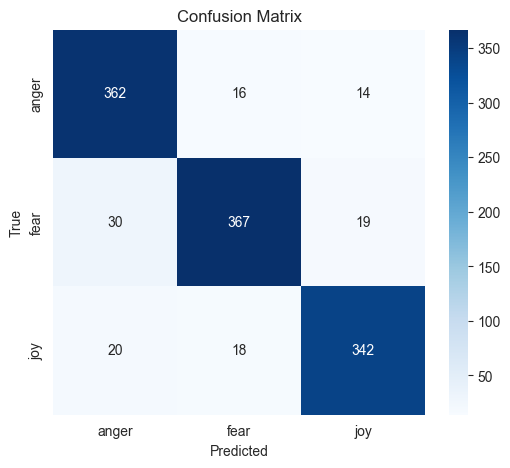

In [53]:
import seaborn as sns  # Import seaborn for plotting
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Choose the best model based on test accuracy (e.g., Random Forest)
best_model = grid_search.best_estimator_
best_pred = best_model.predict(X_test_cv)

# Compute confusion matrix
cm = confusion_matrix(y_test, best_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [54]:
# testing
test_text='Im looking good and feeling good other than this crappy cold i m dealing with'
test_text_processed=[preprocess_text(test_text)]
print(test_text_processed)

['im look good feel good crappi cold deal']


In [55]:
test_text_vc=v.transform(test_text_processed)
test_pred=RFC.predict(test_text_vc)
classes=['anger','fear','joy']
test_pred_labels = [classes[pred] for pred in test_pred]
print(test_pred_labels)

['joy']
